#                                            ES654 Prerequsite test
####                                                                             Anugu Arun Reddy (21110029)

### Question 1


    
While multiplying 2 matrices A (nxk) and B (kxm), in order to get C (nxm).

Total number of multiplications required = $k*m*n$.

Total number of additions required = $(k-1)*m*n$.

Explaination is given below.</b>

$ A_(nxk) * B_(kxm) = C_(nxm) $


In order to get $C_(ij)$, we mutiply and add the corresponding elements of ith row of A and jth coloumn of B. There are k elements in both of them, thus we need k number of multiplications, and k-1 number of additions (1 addition is required to add 2 numbers). And we are supposed to find $m*n$ such entries of matrix C. Hence we need total of 
$ k*m*n $ number of multiplications and $(k-1)*m*n$ number of additions.

### Question 2

Choosing matrices arbitrary matrices A and B. 

In [2]:


A = [[12,23,44,21,45],[11,34,67,23,88],[10,9,8,3,71],[18,98,23,39,31]]
B = [[3,19,99],[89,78,61],[13,90,73],[14,52,67],[18,16,15]]
C = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]





for i in range(len(A)):
    for j in range(len(B[0])):
        result = 0
        for l in range(len(A[0])):
            result += A[i][l]*B[l][j]
        C[i][j] = result
        




print(C)

[[3759, 7794, 7885], [5836, 11495, 10915], [2255, 2904, 3389], [10179, 12580, 12517]]


In [3]:
%%timeit

A = [[12,23,44,21,45],[11,34,67,23,88],[10,9,8,3,71],[18,98,23,39,31]]
B = [[3,19,99],[89,78,61],[13,90,73],[14,52,67],[18,16,15]]
C = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]





for i in range(len(A)):
    for j in range(len(B[0])):
        result = 0
        for l in range(len(A[0])):
            result += A[i][l]*B[l][j]
        C[i][j] = result
        






12.9 µs ± 47.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
import numpy as np

In [5]:




A = np.array([[12,23,44,21,45],[11,34,67,23,88],[10,9,8,3,71],[18,98,23,39,31]])
B = np.array([[3,19,99],[89,78,61],[13,90,73],[14,52,67],[18,16,15]])
C = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0]])



C = np.dot(A,B)


print(C)

[[ 3759  7794  7885]
 [ 5836 11495 10915]
 [ 2255  2904  3389]
 [10179 12580 12517]]


In [6]:
%%timeit



A = np.array([[12,23,44,21,45],[11,34,67,23,88],[10,9,8,3,71],[18,98,23,39,31]])
B = np.array([[3,19,99],[89,78,61],[13,90,73],[14,52,67],[18,16,15]])
C = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0]])



C = np.dot(A,B)




9.86 µs ± 202 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<b>We get the same answer with both the methods</b>

<b>Numpy implementation is faster than list implementation. Numpy is faster because of better memory management, that allows parallel operations on the data. Numpy arrays store elements of simgle datatype. Numpy library is written using C and C++, which allows elements of list to be stored in continuous blocks of memory unlike python, this also improves processing time.</b>

### Question 3

<b>Time complexity of method given in the question is O($n^2$).

<b>Finding the median involves finding (floor(n/2)+1)th largest element if n is odd and mean of (n/2)th and ((n/2)+1)th element if n is even. overall first we need to find ((n/2)+1)th largest element. This would need atleast ((n/2)+1) passes of the array. In each pass of the array we need to make atleast (n-1) comparisions between n elements. Therefore total number of operations is of the order ((n/2)+1)*(n-1) which gives us time complexity of O($n^2$).</b>

<b>A better method would be to first sort the array with O($n(log(n)$) time complexity and finding the median would be done in constant time.

In [7]:
# method given in the question

def largest(arr,n):
   # Initialize maximum element
   mx = arr[0]        
   
   # Traverse array elements from second         
   # and compare every element with          
   # current max         
   for i in range(1, n):         
     if arr[i] > mx:         
         mx = arr[i]  
    
    
   return mx

def find_kth_largest (arr,n,k):
    for i in range(1,k+1):
        k_th_largest = largest(arr,n)
        arr.remove(k_th_largest)
        n = n-1
        
    return k_th_largest

x = [10,5,4,1,11,1413,1241,12,412,1214,2124,314,134,11,434,553,135,1341,134,1134,5131,13413,1241,134,111,412,412434,41,23,1231,32131,3213,4,13535,5365,76,8,87587,8]




def calculate_median(arr,n):
    if (n%2==0):
        return ((find_kth_largest(x.copy(),len(x),n//2)) + ((find_kth_largest(x.copy(),len(x),(n//2)+1))))/2
    else:
        return (find_kth_largest(x.copy(),len(x),(n//2)+1))
                
print(calculate_median(x,len(x)))

412


In [8]:
%%timeit


k = (calculate_median(x,len(x)))

37.5 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
# finding median after sorting

def mergeSort(array):
    if len(array) > 1:

        
        r = len(array)//2
        L = array[:r]
        M = array[r:]

       
        mergeSort(L)
        mergeSort(M)

        i = j = k = 0

        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1

     
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1

def find_median (array):
    mergeSort(array)
    
    if (len(array)%2==0):
        return (array[(len(array)//2)]+array[(len(array)//2)-1])/2
    else:
        return array[(len(array)//2)]

x = [10,5,4,1,11,1413,1241,12,412,1214,2124,314,134,11,434,553,135,1341,134,1134,5131,13413,1241,134,111,412,412434,41,23,1231,32131,3213,4,13535,5365,76,8,87587,8]



print(find_median(x))




412


In [10]:
%%timeit

z = find_median(x)

57.2 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
x = np.array(x)

In [12]:
%%timeit


z = (np.median(x))



12 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<b>For large arrays numpy takes much less time than both sorting and looping through the array approach.</b>

### Question 4

$ f(x,y) = x^2y + y^3sin(x) $

$ \frac{\partial f}{\partial x} = 2xy + y^3cos(x) $

$ \frac{\partial f}{\partial y}  = x^2 + 3sin(x)y^2 $

### Question 5

In [13]:
import jax.numpy as jnp
from jax import grad

Gradients using jax are calculated below.

In [49]:
def function (x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)

generator = np.random.RandomState(1)
a = generator.normal(loc=5.0,scale=0.01,size = [1,10]) # random values of x
b = generator.normal(loc=5.0,scale=0.01,size = [1,10]) # random values of y


df_dx = grad(function)
df_dy = grad(function, argnums=1)
a = jnp.asarray(a)
b = jnp.asarray(b)
a1 = a[0]
b1 = b[0]

pd_x = []
pd_y = []

for i in range(10):
    pd_x.append((df_dx(a1[i],b1[i])))
    pd_y.append((df_dy(a1[i],b1[i])))
    
pd_x = jnp.asarray(pd_x).reshape(1,10)
pd_y = jnp.asarray(pd_y).reshape(1,10)

gradients_jax = np.append(pd_x,pd_y,axis = 0)

print(gradients_jax.T)



[[ 88.03822  -46.82074 ]
 [ 84.02948  -46.51677 ]
 [ 84.6718   -46.990604]
 [ 83.94533  -47.139854]
 [ 86.942696 -46.97158 ]
 [ 82.134964 -47.301365]
 [ 87.662025 -46.313087]
 [ 84.198906 -46.902367]
 [ 85.88522  -46.8313  ]
 [ 85.31515  -47.16497 ]]


Gradient as calculated in question 4.

$ \frac{\partial f}{\partial x} = 2xy + y^3cos(x) $

$ \frac{\partial f}{\partial y}  = x^2 + 3sin(x)y^2 $

The gradients calculate according to the formula in question 4, for 10 random values of (x,y) is given below.

In [15]:
def partial_x (x,y):
    return  2*x*y + (y**3)*np.cos(x)

def partial_y (x,y):
    return  x**2 + 3*np.sin(x)*(y**2)

df_dx = []
df_dy = []

for m,n in zip(a,b):
    df_dx.append(partial_x(m,n))
    df_dy.append(partial_y(m,n))
    
df_dx = np.array(df_dx)
df_dy = np.array(df_dy)

gradients = np.append(df_dx,df_dy,axis = 0)

print(gradients.T)

[[ 88.03822  -46.82074 ]
 [ 84.02948  -46.51676 ]
 [ 84.6718   -46.990604]
 [ 83.94533  -47.139854]
 [ 86.942696 -46.97158 ]
 [ 82.134964 -47.301373]
 [ 87.662025 -46.31308 ]
 [ 84.198906 -46.902367]
 [ 85.88522  -46.83129 ]
 [ 85.31515  -47.164978]]


First column is df_dx and second column is df_dy. We get the same gradient for 10 random points from the method of question 4 and jax.

### Question 6

In [16]:
import sympy as sympy
from sympy import *

In [17]:
x,y = symbols('x y')
function = (x**2)*y + (y**3)*sympy.sin(x)
function

x**2*y + y**3*sin(x)

In [18]:
diff(function,x)

2*x*y + y**3*cos(x)

In [19]:
diff(function,y)

x**2 + 3*y**2*sin(x)

In [20]:
x,y = symbols('x y')

function = (x**2)*y + (y**3)*sympy.sin(x)

df_dx_sympy = diff(function,x)
df_dy_sympy = diff(function,y)

pd_x = []
pd_y = []

for i in range(10):
    pd_x.append(float(df_dx_sympy.subs({x:a[0][i], y:b[0][i]})))
    pd_y.append(float(df_dy_sympy.subs({x:a[0][i], y:b[0][i]})))
    
pd_x = np.array(pd_x).reshape(1,10)
pd_y = np.array(pd_y).reshape(1,10)



gradients_sympy = np.append(pd_x,pd_y,axis = 0)


print(gradients_sympy.T)



[[ 88.03822457 -46.82073136]
 [ 84.02947417 -46.51676452]
 [ 84.6718036  -46.99060782]
 [ 83.94532935 -47.13984906]
 [ 86.94269568 -46.97158342]
 [ 82.13497097 -47.30137391]
 [ 87.66202727 -46.31307883]
 [ 84.19890593 -46.90236853]
 [ 85.8852285  -46.83129113]
 [ 85.31514619 -47.1649755 ]]


<font size = "3">Analytically we get the same functions (i.e partial derivatives) in both method 4 and sympy. For some random values of (x,y) too, we get the same values of gradients

### Question 7

In [50]:
record = {2022:{'Branch1':{'Student_1':{'Roll Number':1,'Name':'N', 'Marks':{'Maths':100, 'English':70}}},'Branch2':{}},
          2023:{'Branch1':{},'Branch2':{}},
          2024:{'Branch1':{},'Branch2':{}},
          2025:{'Branch1':{},'Branch2':{}}}

In [51]:
print(record)

{2022: {'Branch1': {'Student_1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch2': {}}, 2023: {'Branch1': {}, 'Branch2': {}}, 2024: {'Branch1': {}, 'Branch2': {}}, 2025: {'Branch1': {}, 'Branch2': {}}}


### Question 8

In [52]:
class Student:
    def __init__(self,name,roll_no,marks):
        self.name = name
        self.roll_no = roll_no
        self.marks = marks
        
class Branch:
    def __init__(self,branch_no):
        self.branch_no = branch_no
        self.students = []
        
    def add_student (self,student):
        self.students.append(student)

class Year:
    def __init__(self,year):
        self.year = year
        self.branches = []
    
    def add_branch (self,branch):
        self.branches.append(branch)
        
database = []

In [53]:
Student_1 = Student("N",1,{'Maths':100, 'English':70})
Branch_1_2022 = Branch(1)
Branch_1_2022.add_student(Student_1)
Branch_2_2022 = Branch(2)
Year_2022 = Year(2022)
Year_2022.add_branch (Branch_1_2022)
Year_2022.add_branch (Branch_2_2022)
Branch_1_2023 = Branch(1)
Branch_2_2023 = Branch(1)

Branch_1_2024 = Branch(1)
Branch_2_2024 = Branch(1)

Branch_1_2025 = Branch(1)
Branch_2_2025 = Branch(1)


Year_2023 = Year(2023)
Year_2023.add_branch (Branch_1_2023)
Year_2023.add_branch (Branch_2_2023)

Year_2024 = Year(2024)
Year_2024.add_branch (Branch_1_2024)
Year_2024.add_branch (Branch_2_2024)

Year_2025 = Year(2025)
Year_2025.add_branch (Branch_1_2025)
Year_2025.add_branch (Branch_2_2025)

database.append(Year_2022)
database.append(Year_2023)
database.append(Year_2024)
database.append(Year_2025)

In [54]:
print(Year_2022.branches[0].students[0].name)

N


In [55]:
print(Year_2022.branches[0].students[0].roll_no)

1


In [56]:
print(Year_2022.branches[0].students[0].marks)

{'Maths': 100, 'English': 70}


### Question 9

In [57]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

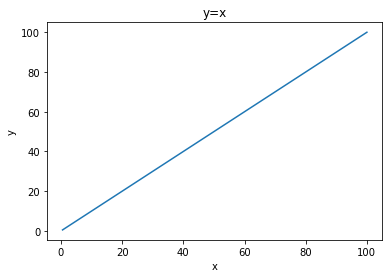

In [58]:
x = np.arange(0.5,100.5,0.5)
y = x
plt.plot(x,y)
plt.title('y=x')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

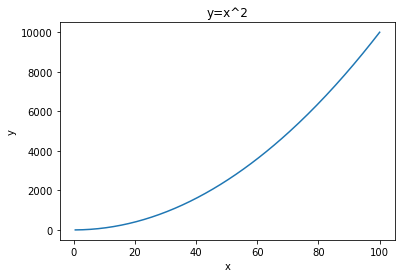

In [59]:
x = np.arange(0.5,100.5,0.5)
y = x**2
plt.plot(x,y)
plt.title('y=x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

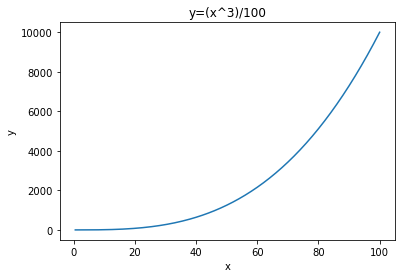

In [60]:
x = np.arange(0.5,100.5,0.5)
y = (x**3)/100
plt.plot(x,y)
plt.title('y=(x^3)/100')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

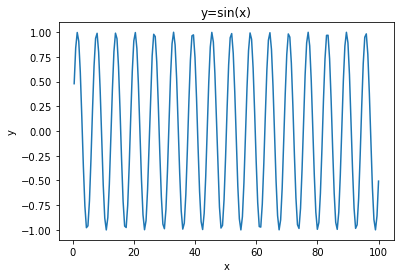

In [61]:
x = np.arange(0.5,100.5,0.5)
y = np.sin(x)
plt.plot(x,y)
plt.title('y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

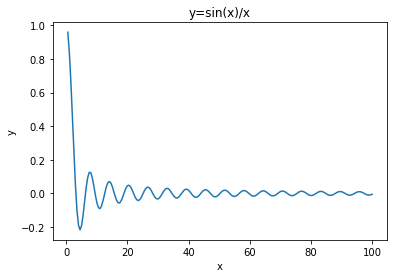

In [62]:
x = np.arange(0.5,100.5,0.5)
y = (np.sin(x))/x
plt.plot(x,y)
plt.title('y=sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

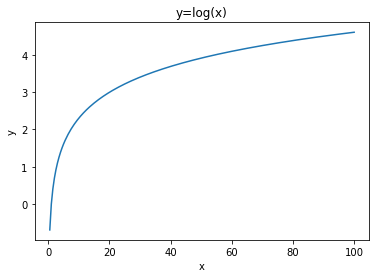

In [63]:
x = np.arange(0.5,100.5,0.5)
y = np.log(x)
plt.plot(x,y)
plt.title('y=log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

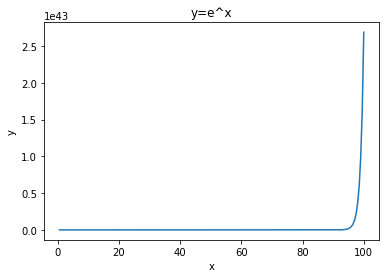

In [64]:
x = np.arange(0.5,100.5,0.5)
y = np.exp(x)
plt.plot(x,y)
plt.title('y=e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.show

### Question 10

In [65]:
array = np.random.uniform(low = 1,high = 2, size = (20,5))

In [66]:
import pandas as pd

In [67]:
data = pd.DataFrame(array)
data.columns = ['a','b','c','d','e']
print(data)

           a         b         c         d         e
0   1.044201  1.745183  1.244446  1.479039  1.349681
1   1.097488  1.963587  1.388656  1.895002  1.911251
2   1.943251  1.045539  1.658343  1.482178  1.517841
3   1.575923  1.068660  1.733408  1.160998  1.984799
4   1.815636  1.561423  1.866445  1.408063  1.753817
5   1.755201  1.528458  1.869619  1.182286  1.221922
6   1.101210  1.406528  1.427726  1.021935  1.046339
7   1.070797  1.322971  1.031708  1.677777  1.708531
8   1.496562  1.530080  1.232681  1.773423  1.646038
9   1.683357  1.483238  1.052148  1.115697  1.571741
10  1.472547  1.171020  1.900313  1.006115  1.896420
11  1.079850  1.792273  1.529444  1.039637  1.444622
12  1.310141  1.184777  1.017772  1.232106  1.878025
13  1.094628  1.244658  1.725447  1.755909  1.264901
14  1.571398  1.084331  1.144264  1.171305  1.403676
15  1.052358  1.165035  1.965591  1.561204  1.508027
16  1.754400  1.456830  1.351190  1.508094  1.921107
17  1.938752  1.889800  1.645411  1.269922  1.

In [68]:
x = data.std()
index_max = np.argmax(x)
print(f"the column with highest standard deviation is {data.columns[index_max]}")

the column with highest standard deviation is a


In [69]:
y = data.mean(axis=1)
print(f"The row with lowest mean is {np.argmin(y)}")

The row with lowest mean is 6


### Question 11

In [70]:
X = 0
for x in range(5):
    X += data.iloc[:,x]
data.insert(5,"f",X)

In [71]:
print(data)

           a         b         c         d         e         f
0   1.044201  1.745183  1.244446  1.479039  1.349681  6.862550
1   1.097488  1.963587  1.388656  1.895002  1.911251  8.255983
2   1.943251  1.045539  1.658343  1.482178  1.517841  7.647152
3   1.575923  1.068660  1.733408  1.160998  1.984799  7.523789
4   1.815636  1.561423  1.866445  1.408063  1.753817  8.405383
5   1.755201  1.528458  1.869619  1.182286  1.221922  7.557485
6   1.101210  1.406528  1.427726  1.021935  1.046339  6.003738
7   1.070797  1.322971  1.031708  1.677777  1.708531  6.811785
8   1.496562  1.530080  1.232681  1.773423  1.646038  7.678783
9   1.683357  1.483238  1.052148  1.115697  1.571741  6.906181
10  1.472547  1.171020  1.900313  1.006115  1.896420  7.446415
11  1.079850  1.792273  1.529444  1.039637  1.444622  6.885825
12  1.310141  1.184777  1.017772  1.232106  1.878025  6.622820
13  1.094628  1.244658  1.725447  1.755909  1.264901  7.085544
14  1.571398  1.084331  1.144264  1.171305  1.403676  6

In [72]:
X = np.where(data.iloc[:,5]<8, "LT8", "GT8")
data.insert(6,"g",X)
print(data)

           a         b         c         d         e         f    g
0   1.044201  1.745183  1.244446  1.479039  1.349681  6.862550  LT8
1   1.097488  1.963587  1.388656  1.895002  1.911251  8.255983  GT8
2   1.943251  1.045539  1.658343  1.482178  1.517841  7.647152  LT8
3   1.575923  1.068660  1.733408  1.160998  1.984799  7.523789  LT8
4   1.815636  1.561423  1.866445  1.408063  1.753817  8.405383  GT8
5   1.755201  1.528458  1.869619  1.182286  1.221922  7.557485  LT8
6   1.101210  1.406528  1.427726  1.021935  1.046339  6.003738  LT8
7   1.070797  1.322971  1.031708  1.677777  1.708531  6.811785  LT8
8   1.496562  1.530080  1.232681  1.773423  1.646038  7.678783  LT8
9   1.683357  1.483238  1.052148  1.115697  1.571741  6.906181  LT8
10  1.472547  1.171020  1.900313  1.006115  1.896420  7.446415  LT8
11  1.079850  1.792273  1.529444  1.039637  1.444622  6.885825  LT8
12  1.310141  1.184777  1.017772  1.232106  1.878025  6.622820  LT8
13  1.094628  1.244658  1.725447  1.755909  1.26

In [73]:
count = 0
for x in data.iloc[:,6]:
    if (x=="LT8"):
        count += 1
print(f"The number of rows in dataframe where value in column g in LT8 is {count}")

The number of rows in dataframe where value in column g in LT8 is 16


In [74]:
X = []
Y = []

for x in data.iloc[:,5]:
    if (x<8):
        X.append(x)
    else:
        Y.append(x)

std_LT8 = np.std(X)
std_GT8 = np.std(Y)

print(f"If value in column g is LT8 then standard devaition of values in column f is {std_LT8}")
print(f"If value in column g is GT8 then standard devaition of values in column f is {std_GT8}")

If value in column g is LT8 then standard devaition of values in column f is 0.5110641247475086
If value in column g is GT8 then standard devaition of values in column f is 0.1288645473573526


### Question 12

<font size = "3">Broadcasting in numpy happens when we try to perform operations on arrays that don't have compatible shapes. Numpy then tries to extend one or both of the arrays along rows or columns to match their shapes. Examples are given below.

In [75]:
x = np.arange(5) #  1x5 array
print("x has 1x5 dimensions",x)
print()
y = 4 # 1x1 array
print("y has 1x1 dimensions",y)
print()
z = x+y # here the array y is broadcasted along row to match array x's shape.
print("here the array y is broadcasted along row to match array x's shape to give z = x+y.",z)
print()

a = np.arange(5) # 1x5 array
print("a has 1x5 dimensions",a)
print()
b = np.arange(5).reshape(-1,1) #5x1 array
print("b has 5x1 dimension",b)
print()
c = a+b # both the arrays a and b are broadcasted to a 5x5 shape array so that their dimension matches.
print("both the arrays a and b are broadcasted to a 5x5 shape array so that their dimension matches to get c=a+b",c)

x has 1x5 dimensions [0 1 2 3 4]

y has 1x1 dimensions 4

here the array y is broadcasted along row to match array x's shape to give z = x+y. [4 5 6 7 8]

a has 1x5 dimensions [0 1 2 3 4]

b has 5x1 dimension [[0]
 [1]
 [2]
 [3]
 [4]]

both the arrays a and b are broadcasted to a 5x5 shape array so that their dimension matches to get c=a+b [[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]


### Question 13

In [76]:
def argmin (x):
    min = 0
    for i in range(len(x)):
        if (x[i]<x[min]):
            min = i
    return min

A = np.array([2,0,1,5,6,7])
print(argmin(A))

1


In [48]:
np.argmin(A)

1